In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
from collections import namedtuple
from matplotlib.lines import Line2D


def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.fM' % (x * 1e-6)

def periods_to_dates(periods):

    period_dict = {
        5:'7/1989-10/1989',
        6:'11/1989-3/1990',
        7:'4/1990-9/1993',
        8:'10/1993-8/1996',
        9:'10/1996-3/2000',
        10:'4/2000-2/2004',
        11:'3/2004-8/2007',
        12:'9/2007-9/2009',
        13:'10/2009-4/2012',
        14:'5/2012-5/2012', 
        15:'6/2012-12/2014', 
        16:'2/2015-8/2015',
        17:'10/2015-6/2019', 
        18:'7/2019-7/2020'
    }
    
    if isinstance(periods, list):
        out = period_dict[periods[0]] +' & '+ period_dict[periods[1]]
        return out 
    else:
        return r"$\bf{" + 'Period\ '+ str(periods)+ "}$"+'\n'+period_dict[periods]        

In [2]:
print('Reading file...')
df_cleaned = pd.read_csv('../out_files/tell_all_cleaned.csv') #
df_cleaned = df_cleaned[df_cleaned['speech'].notna()]
df_cleaned

Reading file...


,member_name,sitting_date,parliamentary_period,parliamentary_session,parliamentary_sitting,political_party,government,member_region,roles,member_gender,speaker_info,speech
0,κρητικος νικολαου παναγιωτης,03/07/1989,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,['τζαννετακη τζαννη(02/07/1989-12/10/1989)'],β' πειραιως,['δ αντιπροεδρος βουλης(07/03/1989-21/11/1989)'],male,προεδρευων,παρακαλειται @sw γραμματεας βουλγαρακης @sw συ...
1,κρητικος νικολαου παναγιωτης,03/07/1989,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,['τζαννετακη τζαννη(02/07/1989-12/10/1989)'],β' πειραιως,['δ αντιπροεδρος βουλης(07/03/1989-21/11/1989)'],male,προεδρευων,παρακαλειται @sw κυριος γραμματεας @sw συνοδευ...
2,κρητικος νικολαου παναγιωτης,03/07/1989,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,['τζαννετακη τζαννη(02/07/1989-12/10/1989)'],β' πειραιως,['δ αντιπροεδρος βουλης(07/03/1989-21/11/1989)'],male,προεδρευων,κυριοι συναδελφοι παρακαλω @sw βουλη @sw εξουσ...
3,NaN,03/07/1989,period 5,session 1,sitting 1,βουλη,['τζαννετακη τζαννη(02/07/1989-12/10/1989)'],NaN,NaN,NaN,βουλευτης/ες,@sw @sw
4,κρητικος νικολαου παναγιωτης,03/07/1989,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,['τζαννετακη τζαννη(02/07/1989-12/10/1989)'],β' πειραιως,['δ αντιπροεδρος βουλης(07/03/1989-21/11/1989)'],male,προεδρευων,@sw βουλη παρεσχε @sw ζητηθεισα εξουσιοδοτηση....
...,...,...,...,...,...,...,...,...,...,...,...,...
1280913,κωνσταντινοπουλος κωνσταντινου οδυσσεας,24/07/2020,period 18 review 9,session 1,sitting 187,κινημα αλλαγης,['μητσοτακη κυριακου(08/07/2019-28/07/2020)'],αρκαδιας,['ε αντιπροεδρος βουλης(18/07/2019-28/07/2020)'],male,προεδρευων,κυριες @sw κυριοι συναδελφοι παρακαλω @sw σωμα...
1280914,NaN,24/07/2020,period 18 review 9,session 1,sitting 187,βουλη,['μητσοτακη κυριακου(08/07/2019-28/07/2020)'],NaN,NaN,NaN,βουλευτης/ες,@sw @sw
1280915,κωνσταντινοπουλος κωνσταντινου οδυσσεας,24/07/2020,period 18 review 9,session 1,sitting 187,κινημα αλλαγης,['μητσοτακη κυριακου(08/07/2019-28/07/2020)'],αρκαδιας,['ε αντιπροεδρος βουλης(18/07/2019-28/07/2020)'],male,προεδρευων,@sw σωμα παρεσχε @sw ζητηθεισα εξουσιοδοτηση κ...
1280916,NaN,24/07/2020,period 18 review 9,session 1,sitting 187,βουλη,['μητσοτακη κυριακου(08/07/2019-28/07/2020)'],NaN,NaN,NaN,βουλευτης/ες,@sw @sw


In [3]:
df_cleaned = df_cleaned.rename(columns={'parliamentary_period': 'period'})

df_cleaned.period = df_cleaned.period.str.replace(' review 9','')
df_cleaned.period = df_cleaned.period.str.replace('period ','')

df_cleaned.period = df_cleaned.period.astype(int)
df_cleaned

,member_name,sitting_date,period,parliamentary_session,parliamentary_sitting,political_party,government,member_region,roles,member_gender,speaker_info,speech
0,κρητικος νικολαου παναγιωτης,03/07/1989,5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,['τζαννετακη τζαννη(02/07/1989-12/10/1989)'],β' πειραιως,['δ αντιπροεδρος βουλης(07/03/1989-21/11/1989)'],male,προεδρευων,παρακαλειται @sw γραμματεας βουλγαρακης @sw συ...
1,κρητικος νικολαου παναγιωτης,03/07/1989,5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,['τζαννετακη τζαννη(02/07/1989-12/10/1989)'],β' πειραιως,['δ αντιπροεδρος βουλης(07/03/1989-21/11/1989)'],male,προεδρευων,παρακαλειται @sw κυριος γραμματεας @sw συνοδευ...
2,κρητικος νικολαου παναγιωτης,03/07/1989,5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,['τζαννετακη τζαννη(02/07/1989-12/10/1989)'],β' πειραιως,['δ αντιπροεδρος βουλης(07/03/1989-21/11/1989)'],male,προεδρευων,κυριοι συναδελφοι παρακαλω @sw βουλη @sw εξουσ...
3,NaN,03/07/1989,5,session 1,sitting 1,βουλη,['τζαννετακη τζαννη(02/07/1989-12/10/1989)'],NaN,NaN,NaN,βουλευτης/ες,@sw @sw
4,κρητικος νικολαου παναγιωτης,03/07/1989,5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,['τζαννετακη τζαννη(02/07/1989-12/10/1989)'],β' πειραιως,['δ αντιπροεδρος βουλης(07/03/1989-21/11/1989)'],male,προεδρευων,@sw βουλη παρεσχε @sw ζητηθεισα εξουσιοδοτηση....
...,...,...,...,...,...,...,...,...,...,...,...,...
1280913,κωνσταντινοπουλος κωνσταντινου οδυσσεας,24/07/2020,18,session 1,sitting 187,κινημα αλλαγης,['μητσοτακη κυριακου(08/07/2019-28/07/2020)'],αρκαδιας,['ε αντιπροεδρος βουλης(18/07/2019-28/07/2020)'],male,προεδρευων,κυριες @sw κυριοι συναδελφοι παρακαλω @sw σωμα...
1280914,NaN,24/07/2020,18,session 1,sitting 187,βουλη,['μητσοτακη κυριακου(08/07/2019-28/07/2020)'],NaN,NaN,NaN,βουλευτης/ες,@sw @sw
1280915,κωνσταντινοπουλος κωνσταντινου οδυσσεας,24/07/2020,18,session 1,sitting 187,κινημα αλλαγης,['μητσοτακη κυριακου(08/07/2019-28/07/2020)'],αρκαδιας,['ε αντιπροεδρος βουλης(18/07/2019-28/07/2020)'],male,προεδρευων,@sw σωμα παρεσχε @sw ζητηθεισα εξουσιοδοτηση κ...
1280916,NaN,24/07/2020,18,session 1,sitting 187,βουλη,['μητσοτακη κυριακου(08/07/2019-28/07/2020)'],NaN,NaN,NaN,βουλευτης/ες,@sw @sw


In [4]:
df_cleaned["size_chars"] = df_cleaned.speech.str.len()
df_cleaned

,member_name,sitting_date,period,parliamentary_session,parliamentary_sitting,political_party,government,member_region,roles,member_gender,speaker_info,speech,size_chars
0,κρητικος νικολαου παναγιωτης,03/07/1989,5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,['τζαννετακη τζαννη(02/07/1989-12/10/1989)'],β' πειραιως,['δ αντιπροεδρος βουλης(07/03/1989-21/11/1989)'],male,προεδρευων,παρακαλειται @sw γραμματεας βουλγαρακης @sw συ...,280
1,κρητικος νικολαου παναγιωτης,03/07/1989,5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,['τζαννετακη τζαννη(02/07/1989-12/10/1989)'],β' πειραιως,['δ αντιπροεδρος βουλης(07/03/1989-21/11/1989)'],male,προεδρευων,παρακαλειται @sw κυριος γραμματεας @sw συνοδευ...,494
2,κρητικος νικολαου παναγιωτης,03/07/1989,5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,['τζαννετακη τζαννη(02/07/1989-12/10/1989)'],β' πειραιως,['δ αντιπροεδρος βουλης(07/03/1989-21/11/1989)'],male,προεδρευων,κυριοι συναδελφοι παρακαλω @sw βουλη @sw εξουσ...,128
3,NaN,03/07/1989,5,session 1,sitting 1,βουλη,['τζαννετακη τζαννη(02/07/1989-12/10/1989)'],NaN,NaN,NaN,βουλευτης/ες,@sw @sw,7
4,κρητικος νικολαου παναγιωτης,03/07/1989,5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,['τζαννετακη τζαννη(02/07/1989-12/10/1989)'],β' πειραιως,['δ αντιπροεδρος βουλης(07/03/1989-21/11/1989)'],male,προεδρευων,@sw βουλη παρεσχε @sw ζητηθεισα εξουσιοδοτηση....,235
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280913,κωνσταντινοπουλος κωνσταντινου οδυσσεας,24/07/2020,18,session 1,sitting 187,κινημα αλλαγης,['μητσοτακη κυριακου(08/07/2019-28/07/2020)'],αρκαδιας,['ε αντιπροεδρος βουλης(18/07/2019-28/07/2020)'],male,προεδρευων,κυριες @sw κυριοι συναδελφοι παρακαλω @sw σωμα...,208
1280914,NaN,24/07/2020,18,session 1,sitting 187,βουλη,['μητσοτακη κυριακου(08/07/2019-28/07/2020)'],NaN,NaN,NaN,βουλευτης/ες,@sw @sw,7
1280915,κωνσταντινοπουλος κωνσταντινου οδυσσεας,24/07/2020,18,session 1,sitting 187,κινημα αλλαγης,['μητσοτακη κυριακου(08/07/2019-28/07/2020)'],αρκαδιας,['ε αντιπροεδρος βουλης(18/07/2019-28/07/2020)'],male,προεδρευων,@sw σωμα παρεσχε @sw ζητηθεισα εξουσιοδοτηση κ...,112
1280916,NaN,24/07/2020,18,session 1,sitting 187,βουλη,['μητσοτακη κυριακου(08/07/2019-28/07/2020)'],NaN,NaN,NaN,βουλευτης/ες,@sw @sw,7


In [5]:
speakers_per_period_df = df_cleaned[['member_name', 'period', 'member_gender', 'political_party', 'size_chars']]
speakers_per_period_df 

,member_name,period,member_gender,political_party,size_chars
0,κρητικος νικολαου παναγιωτης,5,male,πανελληνιο σοσιαλιστικο κινημα,280
1,κρητικος νικολαου παναγιωτης,5,male,πανελληνιο σοσιαλιστικο κινημα,494
2,κρητικος νικολαου παναγιωτης,5,male,πανελληνιο σοσιαλιστικο κινημα,128
3,NaN,5,NaN,βουλη,7
4,κρητικος νικολαου παναγιωτης,5,male,πανελληνιο σοσιαλιστικο κινημα,235
...,...,...,...,...,...
1280913,κωνσταντινοπουλος κωνσταντινου οδυσσεας,18,male,κινημα αλλαγης,208
1280914,NaN,18,NaN,βουλη,7
1280915,κωνσταντινοπουλος κωνσταντινου οδυσσεας,18,male,κινημα αλλαγης,112
1280916,NaN,18,NaN,βουλη,7


In [6]:
speakers_per_period_df = speakers_per_period_df.dropna()
speakers_per_period_df

,member_name,period,member_gender,political_party,size_chars
0,κρητικος νικολαου παναγιωτης,5,male,πανελληνιο σοσιαλιστικο κινημα,280
1,κρητικος νικολαου παναγιωτης,5,male,πανελληνιο σοσιαλιστικο κινημα,494
2,κρητικος νικολαου παναγιωτης,5,male,πανελληνιο σοσιαλιστικο κινημα,128
4,κρητικος νικολαου παναγιωτης,5,male,πανελληνιο σοσιαλιστικο κινημα,235
5,κρητικος νικολαου παναγιωτης,5,male,πανελληνιο σοσιαλιστικο κινημα,331
...,...,...,...,...,...
1280911,κωνσταντινοπουλος κωνσταντινου οδυσσεας,18,male,κινημα αλλαγης,153
1280912,κωνσταντινοπουλος κωνσταντινου οδυσσεας,18,male,κινημα αλλαγης,344
1280913,κωνσταντινοπουλος κωνσταντινου οδυσσεας,18,male,κινημα αλλαγης,208
1280915,κωνσταντινοπουλος κωνσταντινου οδυσσεας,18,male,κινημα αλλαγης,112


Create catch-all `all` party.

In [7]:
all_parties_speakers_per_period_df = speakers_per_period_df.groupby(['period', 'member_gender']).\
    sum().reset_index()
all_parties_speakers_per_period_df['political_party'] = 'all'
all_parties_speakers_per_period_df

,period,member_gender,size_chars,political_party
0,5,female,318759,all
1,5,male,7102139,all
2,6,female,343035,all
3,6,male,6247160,all
4,7,female,5625504,all
5,7,male,127466643,all
6,8,female,1217494,all
7,8,male,32051662,all
8,9,female,8132241,all
9,9,male,109683849,all


Get the speach sizes by party, period, and gender.

In [8]:
all_speakers_per_period_df = speakers_per_period_df.groupby(['political_party', 'period', 'member_gender']).\
    sum().reset_index()
all_speakers_per_period_df

,political_party,period,member_gender,size_chars
0,ανεξαρτητοι (εκτος κομματος),6,male,3935
1,ανεξαρτητοι (εκτος κομματος),7,male,295528
2,ανεξαρτητοι (εκτος κομματος),9,male,56889
3,ανεξαρτητοι (εκτος κομματος),10,male,128384
4,ανεξαρτητοι (εκτος κομματος),11,male,921077
...,...,...,...,...
176,συνασπισμος της αριστερας των κινηματων και τη...,10,male,5204616
177,το ποταμι,16,female,297378
178,το ποταμι,16,male,1273668
179,το ποταμι,17,female,174214


Combine the per party and the `all` party speech lenghts.

In [9]:
all_speakers_per_period_df = pd.concat([all_speakers_per_period_df, all_parties_speakers_per_period_df])
all_speakers_per_period_df

,political_party,period,member_gender,size_chars
0,ανεξαρτητοι (εκτος κομματος),6,male,3935
1,ανεξαρτητοι (εκτος κομματος),7,male,295528
2,ανεξαρτητοι (εκτος κομματος),9,male,56889
3,ανεξαρτητοι (εκτος κομματος),10,male,128384
4,ανεξαρτητοι (εκτος κομματος),11,male,921077
...,...,...,...,...
22,all,16,male,14491012
23,all,17,female,18997609
24,all,17,male,120117234
25,all,18,female,9185673


In [10]:
all_speakers_per_period_df = all_speakers_per_period_df.reset_index(drop=True)
all_speakers_per_period_df

,political_party,period,member_gender,size_chars
0,ανεξαρτητοι (εκτος κομματος),6,male,3935
1,ανεξαρτητοι (εκτος κομματος),7,male,295528
2,ανεξαρτητοι (εκτος κομματος),9,male,56889
3,ανεξαρτητοι (εκτος κομματος),10,male,128384
4,ανεξαρτητοι (εκτος κομματος),11,male,921077
...,...,...,...,...
203,all,16,male,14491012
204,all,17,female,18997609
205,all,17,male,120117234
206,all,18,female,9185673


Break down males and females to different columns.

In [11]:
all_speakers_per_period_df = all_speakers_per_period_df.pivot_table(values='size_chars', 
                                                                    index=['period', 'political_party'], 
                                                                    columns='member_gender', 
                                                                    dropna=False,
                                                                    aggfunc='first')
all_speakers_per_period_df

member_gender                                                 female  \
period political_party                                                 
5      all                                                  318759.0   
       ανεξαρτητοι (εκτος κομματος)                              NaN   
       ανεξαρτητοι δημοκρατικοι βουλευτες                        NaN   
       ανεξαρτητοι ελληνες - πανος καμμενος                      NaN   
       ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατι...        NaN   
...                                                              ...   
18     πανελληνιο σοσιαλιστικο κινημα                            NaN   
       πολιτικη ανοιξη                                           NaN   
       συνασπισμος ριζοσπαστικης αριστερας                 2721659.0   
       συνασπισμος της αριστερας των κινηματων και της...        NaN   
       το ποταμι                                                 NaN   

member_gender                                                   male  
period political_party                                                
5      all                                                 7102139.0  
       ανεξαρτητοι (εκτος κομματος)                              NaN  
       ανεξαρτητοι δημοκρατικοι βουλευτες                        NaN  
       ανεξαρτητοι ελληνες - πανος καμμενος                      NaN  
       ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατι...        NaN  
...                                                              ...  
18     πανελληνιο σοσιαλιστικο κινημα                            NaN  
       πολιτικη ανοιξη                                           NaN  
       συνασπισμος ριζοσπαστικης αριστερας                 9002737.0  
       συνασπισμος της αριστερας των κινηματων και της...        NaN  
       το ποταμι                                                 NaN  

[350 rows x 2 columns]

Get rid of columns name.

In [12]:
all_speakers_per_period_df.columns = all_speakers_per_period_df.columns.values
all_speakers_per_period_df

female  \
period political_party                                                 
5      all                                                  318759.0   
       ανεξαρτητοι (εκτος κομματος)                              NaN   
       ανεξαρτητοι δημοκρατικοι βουλευτες                        NaN   
       ανεξαρτητοι ελληνες - πανος καμμενος                      NaN   
       ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατι...        NaN   
...                                                              ...   
18     πανελληνιο σοσιαλιστικο κινημα                            NaN   
       πολιτικη ανοιξη                                           NaN   
       συνασπισμος ριζοσπαστικης αριστερας                 2721659.0   
       συνασπισμος της αριστερας των κινηματων και της...        NaN   
       το ποταμι                                                 NaN   

                                                                male  
period political_party                                                
5      all                                                 7102139.0  
       ανεξαρτητοι (εκτος κομματος)                              NaN  
       ανεξαρτητοι δημοκρατικοι βουλευτες                        NaN  
       ανεξαρτητοι ελληνες - πανος καμμενος                      NaN  
       ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατι...        NaN  
...                                                              ...  
18     πανελληνιο σοσιαλιστικο κινημα                            NaN  
       πολιτικη ανοιξη                                           NaN  
       συνασπισμος ριζοσπαστικης αριστερας                 9002737.0  
       συνασπισμος της αριστερας των κινηματων και της...        NaN  
       το ποταμι                                                 NaN  

[350 rows x 2 columns]

Flatten the columns and reset the index.

In [13]:
all_speakers_per_period_df = all_speakers_per_period_df.reset_index()
all_speakers_per_period_df

,period,political_party,female,male
0,5,all,318759.0,7102139.0
1,5,ανεξαρτητοι (εκτος κομματος),NaN,NaN
2,5,ανεξαρτητοι δημοκρατικοι βουλευτες,NaN,NaN
3,5,ανεξαρτητοι ελληνες - πανος καμμενος,NaN,NaN
4,5,ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατ...,NaN,NaN
...,...,...,...,...
345,18,πανελληνιο σοσιαλιστικο κινημα,NaN,NaN
346,18,πολιτικη ανοιξη,NaN,NaN
347,18,συνασπισμος ριζοσπαστικης αριστερας,2721659.0,9002737.0
348,18,συνασπισμος της αριστερας των κινηματων και τη...,NaN,NaN


Drop the rows where we have no data for both males and females.

In [14]:
all_speakers_per_period_df = all_speakers_per_period_df.dropna(subset=['female', 'male'], how='all')
all_speakers_per_period_df

,period,political_party,female,male
0,5,all,318759.0,7102139.0
5,5,δημοκρατικη ανανεωση,NaN,170854.0
11,5,εξωκοινοβουλευτικός,NaN,205525.0
18,5,νεα δημοκρατια,154132.0,3065123.0
20,5,πανελληνιο σοσιαλιστικο κινημα,2939.0,2638934.0
...,...,...,...,...
337,18,κινημα αλλαγης,1205716.0,4952892.0
338,18,κομμουνιστικο κομμα ελλαδας,719848.0,3574978.0
342,18,μετωπο ευρωπαικης ρεαλιστικης ανυπακοης (μερα25),1604256.0,1339514.0
343,18,νεα δημοκρατια,1913160.0,16181119.0


When a single `NaN` remains, fill with zero.

In [15]:
all_speakers_per_period_df.fillna(0, inplace=True)
all_speakers_per_period_df

/home/dina/Documents/repos/paper_greekparliament/.parl_env/lib/python3.7/site-packages/pandas/core/frame.py:5177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,period,political_party,female,male
0,5,all,318759.0,7102139.0
5,5,δημοκρατικη ανανεωση,0.0,170854.0
11,5,εξωκοινοβουλευτικός,0.0,205525.0
18,5,νεα δημοκρατια,154132.0,3065123.0
20,5,πανελληνιο σοσιαλιστικο κινημα,2939.0,2638934.0
...,...,...,...,...
337,18,κινημα αλλαγης,1205716.0,4952892.0
338,18,κομμουνιστικο κομμα ελλαδας,719848.0,3574978.0
342,18,μετωπο ευρωπαικης ρεαλιστικης ανυπακοης (μερα25),1604256.0,1339514.0
343,18,νεα δημοκρατια,1913160.0,16181119.0


Get the total per row.

In [16]:
all_speakers_per_period_df['total'] = all_speakers_per_period_df['male'] + all_speakers_per_period_df['female']
all_speakers_per_period_df

/home/dina/Documents/repos/paper_greekparliament/.parl_env/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,period,political_party,female,male,total
0,5,all,318759.0,7102139.0,7420898.0
5,5,δημοκρατικη ανανεωση,0.0,170854.0,170854.0
11,5,εξωκοινοβουλευτικός,0.0,205525.0,205525.0
18,5,νεα δημοκρατια,154132.0,3065123.0,3219255.0
20,5,πανελληνιο σοσιαλιστικο κινημα,2939.0,2638934.0,2641873.0
...,...,...,...,...,...
337,18,κινημα αλλαγης,1205716.0,4952892.0,6158608.0
338,18,κομμουνιστικο κομμα ελλαδας,719848.0,3574978.0,4294826.0
342,18,μετωπο ευρωπαικης ρεαλιστικης ανυπακοης (μερα25),1604256.0,1339514.0,2943770.0
343,18,νεα δημοκρατια,1913160.0,16181119.0,18094279.0


Do some renaming.

In [17]:
all_speakers_per_period_df.rename(columns={'male': 'male_chars', 'female': 'female_chars'}, inplace=True)
all_speakers_per_period_df

/home/dina/Documents/repos/paper_greekparliament/.parl_env/lib/python3.7/site-packages/pandas/core/frame.py:5042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,period,political_party,female_chars,male_chars,total
0,5,all,318759.0,7102139.0,7420898.0
5,5,δημοκρατικη ανανεωση,0.0,170854.0,170854.0
11,5,εξωκοινοβουλευτικός,0.0,205525.0,205525.0
18,5,νεα δημοκρατια,154132.0,3065123.0,3219255.0
20,5,πανελληνιο σοσιαλιστικο κινημα,2939.0,2638934.0,2641873.0
...,...,...,...,...,...
337,18,κινημα αλλαγης,1205716.0,4952892.0,6158608.0
338,18,κομμουνιστικο κομμα ελλαδας,719848.0,3574978.0,4294826.0
342,18,μετωπο ευρωπαικης ρεαλιστικης ανυπακοης (μερα25),1604256.0,1339514.0,2943770.0
343,18,νεα δημοκρατια,1913160.0,16181119.0,18094279.0


Get the percentages.

In [18]:
all_speakers_per_period_df['male_chars_prc'] = 100 * (all_speakers_per_period_df['male_chars'] 
                                                      / all_speakers_per_period_df['total'])
all_speakers_per_period_df['female_chars_prc'] = 100 * (all_speakers_per_period_df['female_chars'] 
                                                        / all_speakers_per_period_df['total'])
all_speakers_per_period_df                                                                                        

/home/dina/Documents/repos/paper_greekparliament/.parl_env/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,period,political_party,female_chars,male_chars,total,male_chars_prc,female_chars_prc
0,5,all,318759.0,7102139.0,7420898.0,95.704576,4.295424
5,5,δημοκρατικη ανανεωση,0.0,170854.0,170854.0,100.000000,0.000000
11,5,εξωκοινοβουλευτικός,0.0,205525.0,205525.0,100.000000,0.000000
18,5,νεα δημοκρατια,154132.0,3065123.0,3219255.0,95.212184,4.787816
20,5,πανελληνιο σοσιαλιστικο κινημα,2939.0,2638934.0,2641873.0,99.888753,0.111247
...,...,...,...,...,...,...,...
337,18,κινημα αλλαγης,1205716.0,4952892.0,6158608.0,80.422264,19.577736
338,18,κομμουνιστικο κομμα ελλαδας,719848.0,3574978.0,4294826.0,83.239181,16.760819
342,18,μετωπο ευρωπαικης ρεαλιστικης ανυπακοης (μερα25),1604256.0,1339514.0,2943770.0,45.503351,54.496649
343,18,νεα δημοκρατια,1913160.0,16181119.0,18094279.0,89.426713,10.573287


Do the same in a non-pandas way.

In [19]:
percentage_speakers = []

for period, period_subdf in speakers_per_period_df.groupby(['period']):
    all_chars = period_subdf['size_chars'].sum()
    female_chars = period_subdf.loc[(period_subdf.member_gender=='female')]['size_chars'].sum()
    male_chars = period_subdf.loc[(period_subdf.member_gender=='male')]['size_chars'].sum()
    
    percentage_speakers.append([period, 'all', all_chars, female_chars*100/all_chars, male_chars*100/all_chars])

    for party, period_party_subdf in period_subdf.groupby(['political_party']):

        all_chars = period_party_subdf['size_chars'].sum()
        female_chars = period_party_subdf.loc[(period_party_subdf.member_gender=='female')]['size_chars'].sum()
        male_chars = period_party_subdf.loc[(period_party_subdf.member_gender=='male')]['size_chars'].sum()
        percentage_speakers.append([period, party, all_chars, female_chars*100/all_chars, male_chars*100/all_chars])

percentage_speakers_df = pd.DataFrame(data=percentage_speakers, columns=['period', 'party', 'total', 'female_chars', 'male_chars'])


In [20]:
percentage_speakers_df

,period,party,total,female_chars,male_chars
0,5,all,7420898,4.295424,95.704576
1,5,δημοκρατικη ανανεωση,170854,0.000000,100.000000
2,5,εξωκοινοβουλευτικός,205525,0.000000,100.000000
3,5,νεα δημοκρατια,3219255,4.787816,95.212184
4,5,πανελληνιο σοσιαλιστικο κινημα,2641873,0.111247,99.888753
...,...,...,...,...,...
111,18,κινημα αλλαγης,6158608,19.577736,80.422264
112,18,κομμουνιστικο κομμα ελλαδας,4294826,16.760819,83.239181
113,18,μετωπο ευρωπαικης ρεαλιστικης ανυπακοης (μερα25),2943770,54.496649,45.503351
114,18,νεα δημοκρατια,18094279,10.573287,89.426713


Check the sums for the first approach that we can compare with the second.

In [21]:
all_speakers_per_period_sums = all_speakers_per_period_df[[
    'male_chars_prc',
    'female_chars_prc',
    'total'
]].sum(axis=0)
all_speakers_per_period_sums

male_chars_prc      9.934053e+03
female_chars_prc    1.665947e+03
total               2.179246e+09
dtype: float64

And the sums of the second approach, they should be as above.

In [22]:
percentage_speakers_sums = percentage_speakers_df[[
    'male_chars',
    'female_chars',
    'total'
]].sum(axis=0)
percentage_speakers_sums

male_chars      9.934053e+03
female_chars    1.665947e+03
total           2.179246e+09
dtype: float64

Do the check.

In [23]:
all_speakers_per_period_sums.values == percentage_speakers_sums.values

array([ True,  True,  True])

Create a period dataframe with start and end dates in order to find in which period each member activity belongs.

In [24]:
periods = []
df_cleaned['sitting_date'] = pd.to_datetime(df_cleaned['sitting_date'], format='%d/%m/%Y')

for period, subdf in df_cleaned.groupby(['period']):
    subdf.sort_values(by=['sitting_date'], inplace=True)
    start_date = subdf.sitting_date.iloc[0]
    end_date = subdf.sitting_date.iloc[-1]
    periods.append([period, start_date, end_date])
    
periods_df = pd.DataFrame(data=periods, columns = ['period', 'start', 'end'])
periods_df

,period,start,end
0,5,1989-07-03,1989-10-06
1,6,1989-11-20,1990-03-09
2,7,1990-04-21,1993-09-09
3,8,1993-10-21,1994-09-14
4,9,1996-10-07,2000-03-11
5,10,2000-04-20,2004-02-10
6,11,2004-03-18,2007-08-02
7,12,2007-09-26,2009-09-03
8,13,2009-10-14,2012-04-10
9,14,2012-05-17,2012-05-18


In [25]:
members_df = pd.read_csv('../out_files/all_members_activity.csv')
print(members_df.head(2))

members_df = members_df[['member_name', 'gender', 'member_start_date', 'member_end_date', 'political_party']]
members_df['member_start_date'] = pd.to_datetime(members_df['member_start_date'], format='%Y/%m/%d')
members_df['member_end_date'] = pd.to_datetime(members_df['member_end_date'], format='%Y/%m/%d')


                member_name member_start_date member_end_date  \
0  αγατσα αριστειδη αριαδνη        2012-04-04      2012-04-11   
1  αγατσα αριστειδη αριαδνη        2009-10-04      2012-04-03   

                  political_party administrative_region  gender roles  \
0    ανεξαρτητοι (εκτος κομματος)              βοιωτιας  female    []   
1  πανελληνιο σοσιαλιστικο κινημα              βοιωτιας  female    []   

                                     government_name  
0      ['παπαδημου λουκα δ.(11/11/2011-17/05/2012)']  
1  ['καραμανλη α. κωνσταντινου(19/09/2007-07/10/2...  


In [26]:

members_per_period = []

for m_index, m_row in members_df.iterrows():
    
    for p_index, p_row in periods_df.iterrows():

        overlap=1
        Range = namedtuple('Range', ['start', 'end'])
        r1 = Range(start=p_row.start, end=p_row.end)
        r2 = Range(start=m_row.member_start_date, end=m_row.member_end_date)
        latest_start = max(r1.start, r2.start)
        earliest_end = min(r1.end, r2.end)
        delta = (earliest_end - latest_start).days
        overlap = max(0, delta)
        if overlap>0:
            members_per_period.append([m_row.member_name, p_row.period, m_row.gender, m_row.political_party])

In [27]:
members_per_period_df = pd.DataFrame(data=members_per_period, columns=['name', 'period', 'gender', 'party'])

print(members_per_period_df.shape)
members_per_period_df.drop_duplicates(inplace=True)
print(members_per_period_df.shape)
print(members_per_period_df.head)

(5655, 4)
(5220, 4)
<bound method NDFrame.head of                                   name  period  gender  \
0             αγατσα αριστειδη αριαδνη      13  female   
1             αγατσα αριστειδη αριαδνη      13  female   
2           αντωνιου αθανασιου χρηστος      16    male   
3           αντωνιου αθανασιου χρηστος      17    male   
4     μαρκογιαννακης εμμανουηλ χρηστος       5    male   
...                                ...     ...     ...   
5650        στεφανοπουλος κωνσταντινος       9    male   
5651        στεφανοπουλος κωνσταντινος      10    male   
5652        στεφανοπουλος κωνσταντινος      11    male   
5653                  χουντης νικολαος      16    male   
5654                  χουντης νικολαος      18    male   

                                    party  
0            ανεξαρτητοι (εκτος κομματος)  
1          πανελληνιο σοσιαλιστικο κινημα  
2     συνασπισμος ριζοσπαστικης αριστερας  
3     συνασπισμος ριζοσπαστικης αριστερας  
4                          νεα δη

In [28]:
percentage_members = []

for period, period_subdf in members_per_period_df.groupby(['period']):
    all_members = period_subdf.shape[0]
    female_members = period_subdf.loc[(period_subdf.gender=='female')].shape[0]
    male_members = period_subdf.loc[(period_subdf.gender=='male')].shape[0]
    
    percentage_members.append([period, 'all', all_members, female_members*100/all_members, male_members*100/all_members])

    for party, period_party_subdf in period_subdf.groupby(['party']):

        all_members = period_party_subdf.shape[0]
        female_members = period_party_subdf.loc[(period_party_subdf.gender=='female')].shape[0]
        male_members = period_party_subdf.loc[(period_party_subdf.gender=='male')].shape[0]
        percentage_members.append([period, party, all_members, female_members*100/all_members, male_members*100/all_members])
        

In [29]:
percentage_members_df = pd.DataFrame(data=percentage_members, columns=['period', 'party', 'total', 'female_members', 'male_members'])

In [30]:
# percentage_members_df = percentage_members_df.set_index('period')
# percentage_members_df = percentage_members_df[['female_members']] #, 'male_members'
print(percentage_members_df)

     period                                             party  total  \
0         5                                               all    306   
1         5                      ανεξαρτητοι (εκτος κομματος)      1   
2         5                              δημοκρατικη ανανεωση      1   
3         5                               εξωκοινοβουλευτικός      4   
4         5                                    νεα δημοκρατια    147   
..      ...                                               ...    ...   
120      18                                    κινημα αλλαγης     22   
121      18                       κομμουνιστικο κομμα ελλαδας     15   
122      18  μετωπο ευρωπαικης ρεαλιστικης ανυπακοης (μερα25)      9   
123      18                                    νεα δημοκρατια    155   
124      18               συνασπισμος ριζοσπαστικης αριστερας     85   

     female_members  male_members  
0          4.248366     95.751634  
1          0.000000    100.000000  
2          0.000000    100.

In [31]:
# percentage_speech_df = barplot_df.copy()
# percentage_speech_df['all'] = percentage_speech_df.female+percentage_speech_df.male
# percentage_speech_df['female_speakers'] = percentage_speech_df['female']*100/percentage_speech_df['all']
# percentage_speech_df['male_speakers'] = percentage_speech_df['male']*100/percentage_speech_df['all']
# percentage_speech_df=percentage_speech_df[['female_speakers']] #, 'male_speakers']
# percentage_speech_df

In [32]:
percentage_members_df.dtypes

period              int64
party              object
total               int64
female_members    float64
male_members      float64
dtype: object

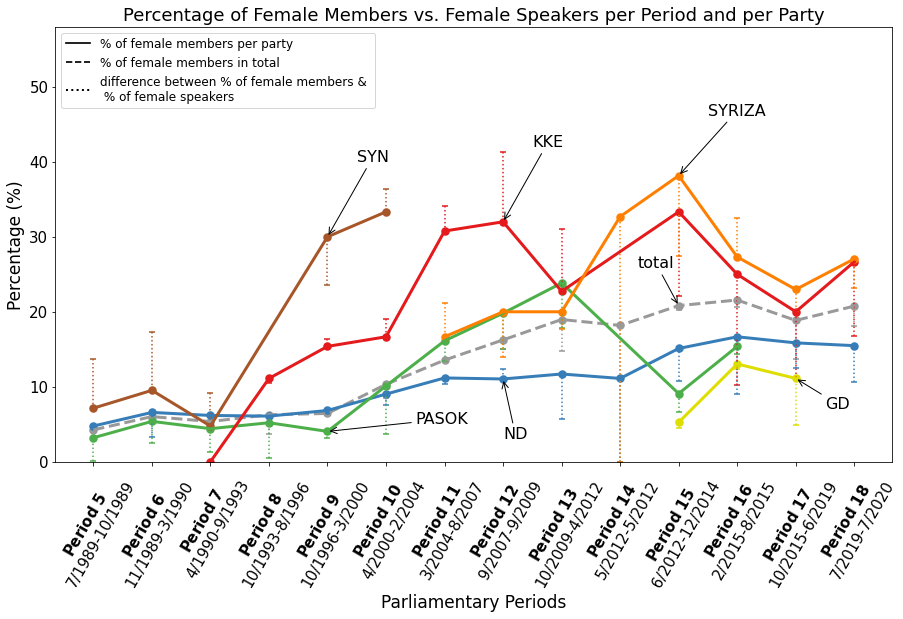

In [35]:
def translate_party(party):
    
    lookup = {'λαικος συνδεσμος - χρυση αυγη':'GD',
              'νεα δημοκρατια':'ND',
              'συνασπισμος ριζοσπαστικης αριστερας':'SYRIZA',
              'συνασπισμος της αριστερας των κινηματων και της οικολογιας':'SYN',
              'πανελληνιο σοσιαλιστικο κινημα':'PASOK',
              'κομμουνιστικο κομμα ελλαδας':'KKE',
              'all':'total'}
    
    if party in lookup.keys():
        return lookup[party]
    return party

fig, ax = plt.subplots(figsize=(15,8))
plt.ylim(0, 58)

CB_color_cycle = {'νεα δημοκρατια':'#377eb8',
                  'συνασπισμος ριζοσπαστικης αριστερας':'#ff7f00', 
                  'πανελληνιο σοσιαλιστικο κινημα':'#4daf4a',
                  #'#f781bf', 
                  'συνασπισμος της αριστερας των κινηματων και της οικολογιας':'#a65628', 
                  #'#984ea3',
                  'all':'#999999', 
                  'κομμουνιστικο κομμα ελλαδας':'#e41a1c', 
                  'λαικος συνδεσμος - χρυση αυγη':'#dede00'}

selected_parties = ['νεα δημοκρατια', 
                    'πανελληνιο σοσιαλιστικο κινημα', 
                    'λαικος συνδεσμος - χρυση αυγη',
                    'συνασπισμος ριζοσπαστικης αριστερας',
                    'συνασπισμος της αριστερας των κινηματων και της οικολογιας',
                    'κομμουνιστικο κομμα ελλαδας',
                    'all'
                   ]

xy_indx = {
    'νεα δημοκρατια': 7, 
    'πανελληνιο σοσιαλιστικο κινημα': 4,
    'λαικος συνδεσμος - χρυση αυγη': 2, # NN
    'συνασπισμος ριζοσπαστικης αριστερας': 4, # Orthogonal Procrustes
    'συνασπισμος της αριστερας των κινηματων και της οικολογιας': 3, # Second-Order Similarity
    'κομμουνιστικο κομμα ελλαδας':5,
    'all': 10,
}

xytext_offsets = {
    'νεα δημοκρατια': (0.,-8),
    'πανελληνιο σοσιαλιστικο κινημα': (1.5,1),
    'λαικος συνδεσμος - χρυση αυγη': (0.5,-4), # NN
    'συνασπισμος ριζοσπαστικης αριστερας': (0.5,8), # Orthogonal Procrustes
    'συνασπισμος της αριστερας των κινηματων και της οικολογιας': (0.5,10), # Second-Order Similarity
    'κομμουνιστικο κομμα ελλαδας':(0.5,10),
    'all':(-0.7,5)
}

for party in percentage_members_df.party.unique():
#     print(party)

    members_party_subdf = percentage_members_df.loc[(percentage_members_df.party==party)]
    speakers_party_subdf = percentage_speakers_df.loc[(percentage_speakers_df.party==party)]

#     if any(i >= 50.0 for i in members_party_subdf.female_members.to_list()):
#         print(party)
#         print(party_subdf.loc[(members_party_subdf.female_members>= 50.0)])
    
    if members_party_subdf.shape[0]>1 and party in selected_parties:
        common_periods = [p for p in members_party_subdf.period.to_list() if p in speakers_party_subdf.period.to_list()]
        
        # Choose the common periods to plot
        members_party_subdf = members_party_subdf[members_party_subdf['period'].isin(common_periods)]
        speakers_party_subdf = speakers_party_subdf[speakers_party_subdf['period'].isin(common_periods)]

        members_party_subdf = members_party_subdf.sort_values('period')
        speakers_party_subdf = speakers_party_subdf.sort_values('period')

#         print(party_subdf)
        X_members = members_party_subdf.period.to_list()
        Y_members = members_party_subdf.female_members.to_list()
        
        plt.scatter(X_members,Y_members, color = CB_color_cycle[party], linewidths=2.5)
        
        if party=='all':
            plt.plot(X_members,Y_members, linestyle='dashed', color = CB_color_cycle[party],
                     label=translate_party(party), linewidth=3)
        else:
            plt.plot(X_members,Y_members, color = CB_color_cycle[party],
                     label=translate_party(party), linewidth=3)
            
        plt.annotate(translate_party(party),
                     fontsize=16, 
                     xy=(X_members[xy_indx[party]], Y_members[xy_indx[party]]), 
                     xytext=(X_members[xy_indx[party]] + xytext_offsets[party][0], 
                             Y_members[xy_indx[party]] + xytext_offsets[party][1]),
                     arrowprops=dict(arrowstyle="->")
                    )
        
        speakers_party_subdf = speakers_party_subdf.sort_values('period')
        X_speakers = speakers_party_subdf.period.to_list()
        Y_speakers = speakers_party_subdf.female_chars.to_list()
        
        plt.scatter(X_speakers,Y_speakers, color = CB_color_cycle[party], marker='_')
        for c in range(len(X_members)):
#             print(c)
#             print(X_members)
#             print(X_speakers)
            ax.vlines(x=X_members[c], ymin=Y_speakers[c], ymax=Y_members[c],
                      color=CB_color_cycle[party], label='test lines', #alpha=0.6,
                      linestyle = 'dotted'
                     )
        
plt.xticks(sorted(percentage_members_df.period.unique()),
           [periods_to_dates(period) for period in sorted(percentage_members_df.period.unique())],
           rotation=60, fontsize=15)


solid_line = Line2D([0,1],[0,1],linestyle='solid', color='black', linewidth=1.7)
dashed_line = Line2D([0,1],[0,1],linestyle='dashed', color='black', linewidth=1.7)
dotted_line = Line2D([0,1],[0,1],linestyle='dotted', color='black', linewidth=2)

ax.legend([solid_line, dashed_line, dotted_line],
          ['% of female members per party', 
           '% of female members in total', 
           'difference between % of female members & \n % of female speakers'],
          fontsize=12, loc='upper left')

ax.set_title('Percentage of Female Members vs. Female Speakers per Period and per Party', fontsize=18)

ax.set_ylabel('Percentage (%)', fontsize=17)
ax.set_xlabel('Parliamentary Periods', fontsize=17)
ax.tick_params(axis='y', labelsize=15)

# plt.xlim(-0.4, 13.4)


ax.figure.savefig('../out_files/gender_distribution_per_period_per_party_with_chars.png', dpi=200, bbox_inches='tight')
